# Import libraries

Although most of the libraries are imported by the respective helper files but importing them here would help in debugging.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import time
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Import the custom helper files

In [2]:
from algorithm_helpers import *
from visualisation_helpers import *

In [3]:
#Optional
import warnings
warnings.filterwarnings('ignore') # Logistic regression does not converge and the warnings are pretty long

# Load and display the dataset

In [4]:
path = '../datasets/vehicles.csv' # path to dataset
df = pd.read_csv(path)

In [5]:
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


# Basic exploratory analysis

In [6]:
df.describe()
# We observe that the data is clean and there are no null values or extreme outliers

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


Let us check if the distribution of classes is even by finding the counts of each class.

In [7]:
print('Number of Opels:', sum(df.Class == 'opel'))
print('Number of Buses:', sum(df.Class == 'bus'))
print('Number of Saabs:', sum(df.Class == 'saab'))
print('Number of Vans:', sum(df.Class == 'van'))

Number of Opels: 212
Number of Buses: 218
Number of Saabs: 217
Number of Vans: 199


Pretty evenly distributed. Looks good!

## Pair plot

The pairplot is now used to check for any obvious correlation among features. The diagonal plots show the distribution of that particular feature with respect to the 4 vehicle types:
* Blue - Opel
* Orange - Bus
* Green - Saab
* Red - Van

We can get some well-defined observations from this, like:
* The compactness of a van is much more than the other vehicles
* The maximum length aspect ratio of an Opel is very high

There are some more observations that can be made but I am skipping them for now as I do not intend to do feature engineering right now (I will try that in the next few days).

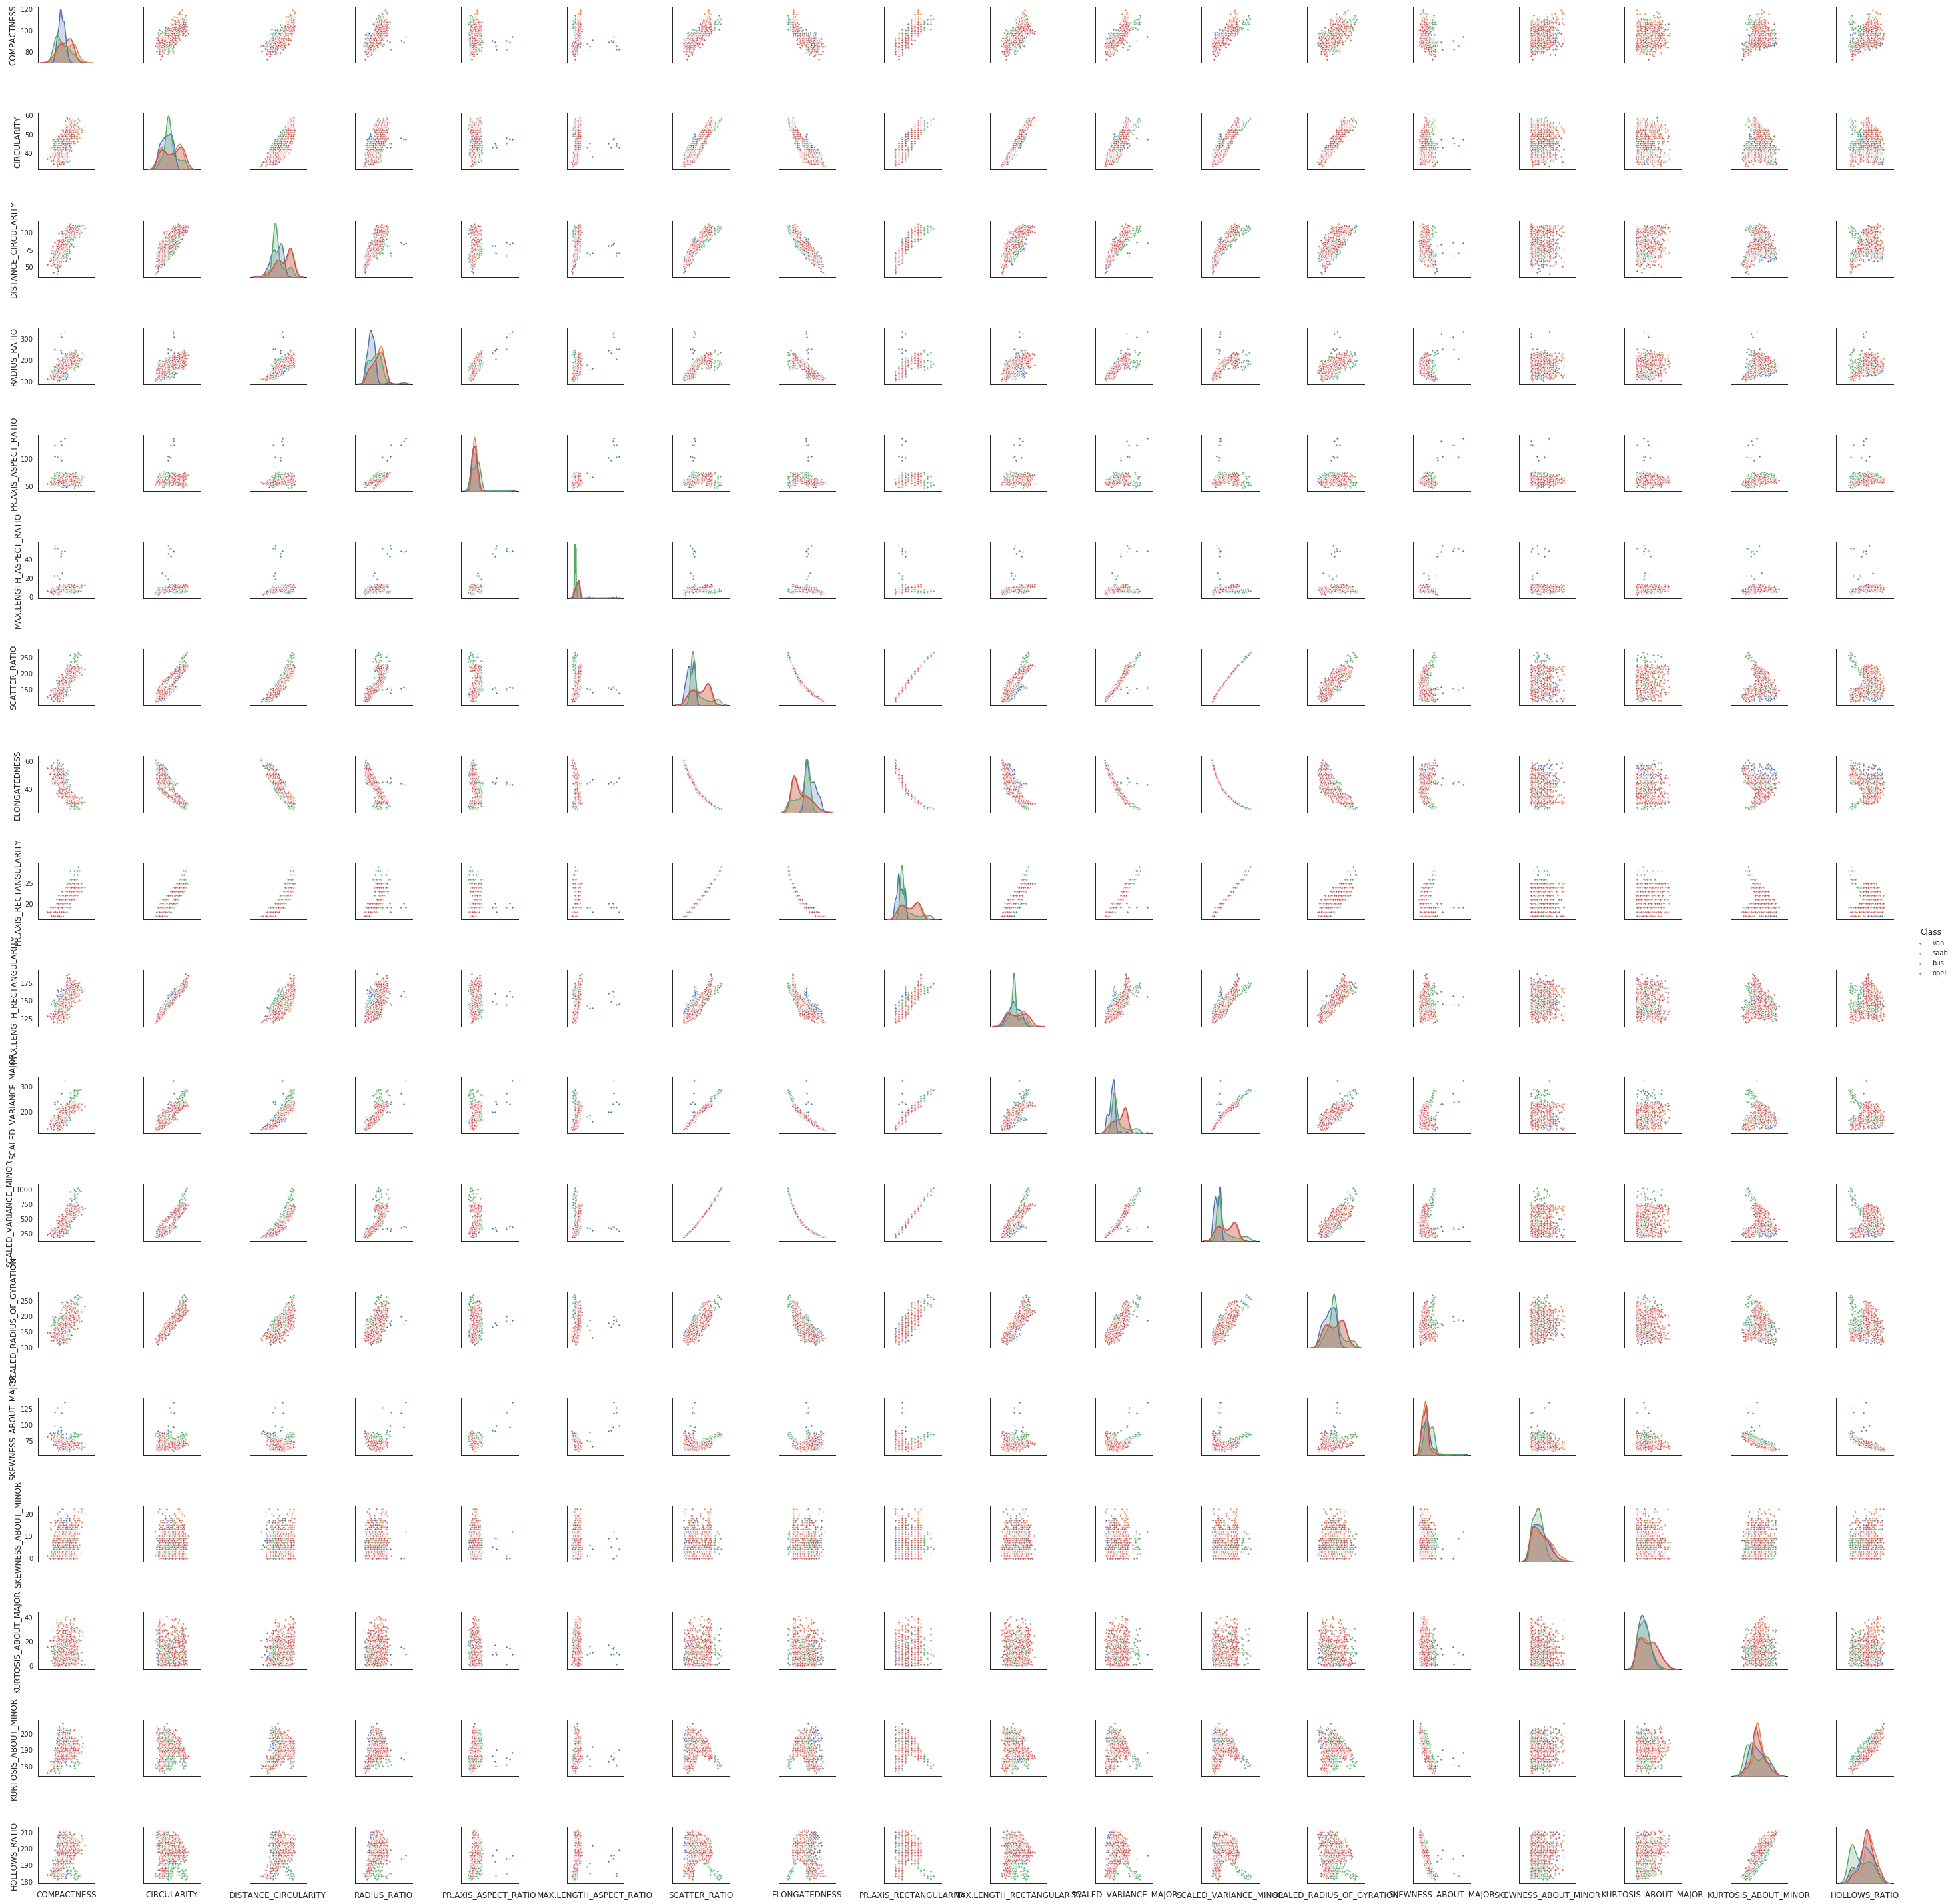

In [8]:
pp = sns.pairplot(df, hue = 'Class', palette = 'deep', height=2.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

## Correlation heatmap

Next we generate a correlation heatmap to directly inspect the correlation among features. What we observe here is that there are some features with very high correlation like ```Circularity``` and ```Scaled_radius_of_gyration```. Also, the features ```Scatter_ratio``` and ```Scaled_variance_minor``` have a correlation of exactly 1.

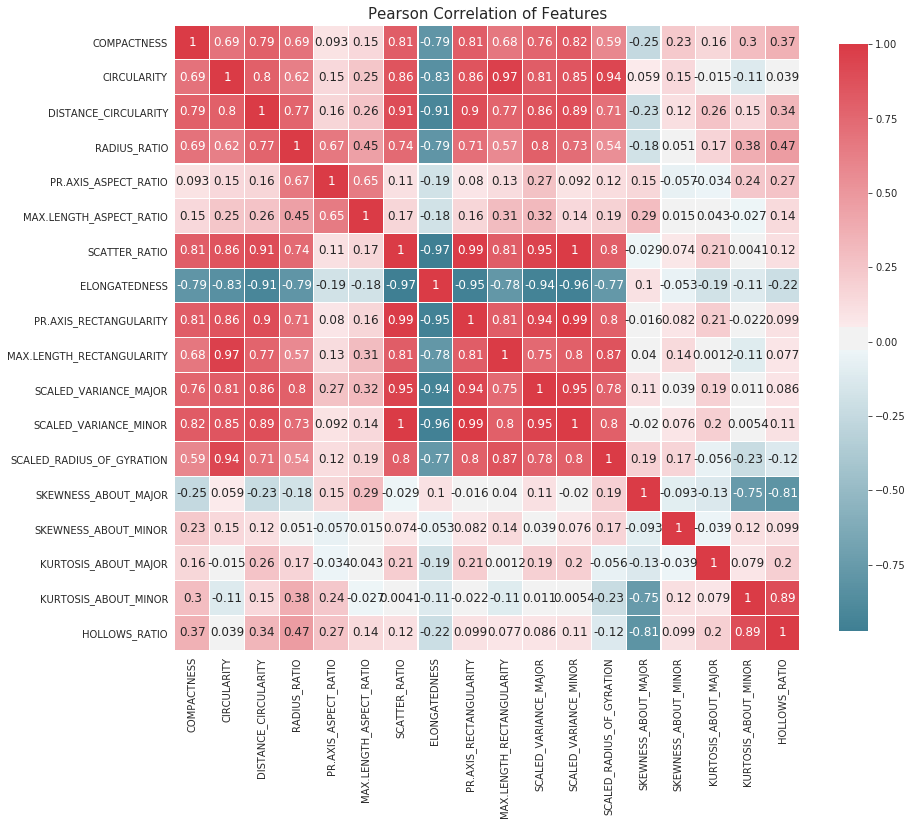

In [9]:
correlation_heatmap(df)

To further inspect the direct correlation between ```Scatter_ratio``` and ```Scaled_variance_minor```, we try to find a multiplication factor between these two.

In [10]:
mult_factor = df.SCATTER_RATIO/df.SCALED_VARIANCE_MINOR
print(mult_factor.head())
print(mult_factor.mean(), mult_factor.std())

del mult_factor #not needed henceforth

0    0.427441
1    0.451515
2    0.325984
3    0.466019
4    0.458462
dtype: float64
0.41371349283758024 0.0779485165171334


It is somewhat evident from the small standard deviation of the multiplying factor that one feature is conclusive of the other. 

# Preprocess the data

## Convert categorical data to numeric format

This is important for the ```Class``` attribute which is to be predicted. There are 4 classes, namely ```opel```, ```bus```, ```saab``` and ```van``` and they are converted to ```0```, ```1```, ```2``` and ```3``` respectively.

The other attributes are not categorical so those need not be converted.

In [11]:
label = LabelEncoder()
df.Class = label.fit_transform(df.Class)

## Normalize the data and split it into train and test sets

An important thing to note here is that although the data is being split into train and test sets, it is currently not going to be used because we are using cross-validation to train our models. However, the 80-20 split is done

In [12]:
X = df.drop(labels='Class', axis=1) # drop the target attribute from the X variable
X = (X - X.mean())/X.std() # normalize the data
y = df.Class # the target attribute to be predicted
# We can comment out the line below
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Machine learning!!

## Machine learning algorithm (MLA) selection and initialization

Including all the algorithms I have heard of. I know about most of the frequently used ones but there are a couple of them like the Bernoulli and Gaussian Naives Bayes algorithms that I have never used before. We are currently using default parameters without tuning them.

In [13]:
MLA = get_algorithms()

## Split dataset for cross-validation

In [14]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 42) # run model with 60-30 split intentionally leaving out 10%

## Train and run predictions on each model using cross-validation

In [15]:
MLA_compare, MLA_predict = run_models(MLA, X, y, cv_split)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.930178,0.842126,0.0669071,0.00340209
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.845168,0.78937,0.0584019,0.671216
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.817554,0.78189,0.0528733,0.0619936
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.80572,0.778346,0.0454533,0.00501392
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.874359,0.772441,0.0788425,0.0832841
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.785602,0.759449,0.0452687,0.00481305
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,0.756693,0.0733426,0.169383
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1,0.753543,0.0979959,0.116395
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.998225,0.752362,0.0619263,0.585948
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.826824,0.748425,0.0534636,0.0458215


## Compare the accuracies of all the models

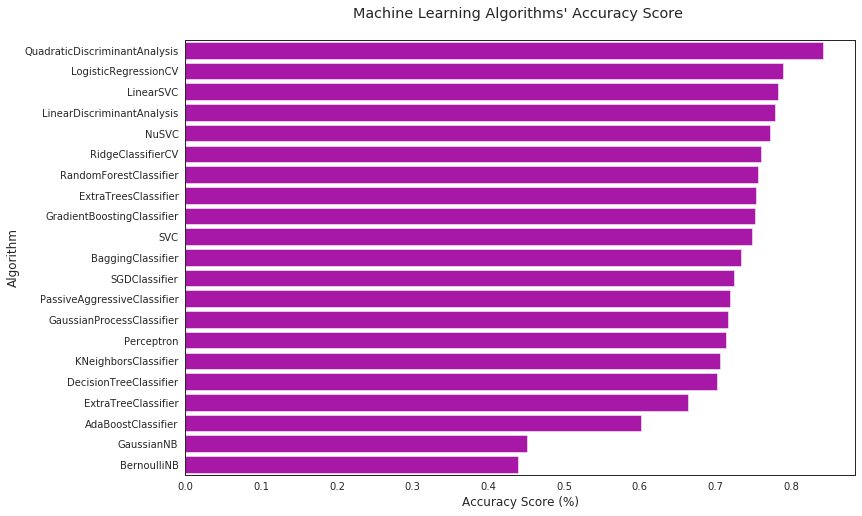

In [16]:
accuracy_barplot(MLA_compare)

To be very honest, I had a lot of expectations on the RF classifier and didn't really expect Logistic Regression to rank so well (2nd place).

I haven't had much experience with Quadratic Discriminant Analysis before but I guess this gives me enough reason to dig into it.

This was overall quite exciting to see and I will look into it to understand in depth the reason behind this in relation with this particular dataset.

## Plot the correlation among the predictions of all the models used

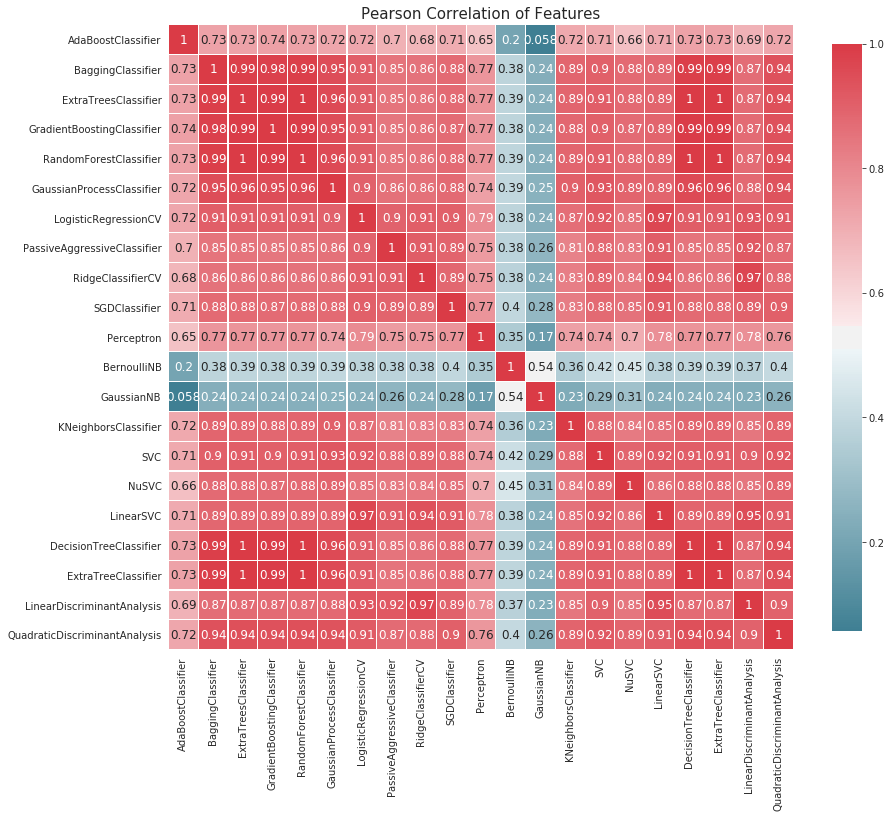

In [17]:
correlation_heatmap(MLA_predict)

We find that a few classifiers have 100% correlation with each other. Between each such pair, only one will be kept for the observations to made next.

## Going a little deep with decision trees

Why decision trees? It's because they are easy to visualize and understand (although I haven't plotted the decision tree yet in this notebook).

In [18]:
_ = run_DT_model(X, y, cv_split)
del _

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
BEFORE DT Training accuracy: 100.00
BEFORE DT Test accuracy: 70.28
BEFORE DT Test score 3*std: +/- 6.95
BEFORE DT Test accuracy (min): 66.93
----------
AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
AFTER DT Training accuracy: 100.00
AFTER DT Test accuracy: 72.01
AFTER DT Test 3*std: +/- 5.68
----------


### Getting rid of unnecessary features

Let's find the attributes which have little or no correlation with the class to be predicted so that they don't confuse our decision tree anymore :)

We find and retrain on the **best** parameters with the **reduced** data set.

In [19]:
print('BEFORE DT RFE Training Shape Old: ', X.shape) 
print('BEFORE DT RFE Training Columns Old: ', X.columns.values)
print('-'*10)

dtree = tree.DecisionTreeClassifier(random_state = 42)

#reduced feature selection/extraction with cross-validation
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(X, y)

#transform X to reduced features as X_rfe and fit new model
X_rfe_cols = X.columns.values[dtree_rfe.get_support()]

print('AFTER DT RFE Training Shape New: ', df[X_rfe_cols].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe_cols)
print('-'*10)

_ = run_DT_model(X[X_rfe_cols], y, cv_split)
del dtree, _ #not needed henceforth

BEFORE DT RFE Training Shape Old:  (846, 18)
BEFORE DT RFE Training Columns Old:  ['COMPACTNESS' 'CIRCULARITY' 'DISTANCE_CIRCULARITY' 'RADIUS_RATIO'
 'PR.AXIS_ASPECT_RATIO' 'MAX.LENGTH_ASPECT_RATIO' 'SCATTER_RATIO'
 'ELONGATEDNESS' 'PR.AXIS_RECTANGULARITY' 'MAX.LENGTH_RECTANGULARITY'
 'SCALED_VARIANCE_MAJOR' 'SCALED_VARIANCE_MINOR'
 'SCALED_RADIUS_OF_GYRATION' 'SKEWNESS_ABOUT_MAJOR' 'SKEWNESS_ABOUT_MINOR'
 'KURTOSIS_ABOUT_MAJOR' 'KURTOSIS_ABOUT_MINOR' 'HOLLOWS_RATIO']
----------
AFTER DT RFE Training Shape New:  (846, 10)
AFTER DT RFE Training Columns New:  ['COMPACTNESS' 'DISTANCE_CIRCULARITY' 'PR.AXIS_ASPECT_RATIO'
 'MAX.LENGTH_ASPECT_RATIO' 'ELONGATEDNESS' 'MAX.LENGTH_RECTANGULARITY'
 'SCALED_VARIANCE_MINOR' 'SCALED_RADIUS_OF_GYRATION'
 'SKEWNESS_ABOUT_MINOR' 'HOLLOWS_RATIO']
----------
BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split

We get rid of 8 attributes or columns by this process and manage to increase our accuracy by a small amount. This can be useful for feature engineering (though I have not tried it in this notebook yet).

## Voting classifier!!

We finally use a voting classifier to obtain the best prediction from all these classifiers.

However, it is to be noted that according to the correlation heatmap a few cells above, there were a few classifiers having 100% correlation amongst themselves. We have discarded the extra ones as they would not add any value to our final prediction.

In [20]:
vote_est, vote_hard_cv, vote_soft_cv = run_voting_model(X, y, cv_split)

Hard Voting Training accuracy: 97.22
Hard Voting Test accuracy: 77.48
Hard Voting Test 3*std: +/- 5.12
----------
Soft Voting Training accuracy: 98.48
Soft Voting Test accuracy: 78.90
Soft Voting Test 3*std: +/- 6.54
----------


## Hyper-parameter tuning

We use grid search to find the best hyper-parameters for each classifier with respect to this dataset.

Note: We use all the columns and do not discard the ones we did for the Decision Tree tuning before.

### Warning: this takes a lot of time to run (16 mins on 16 threads)

For this reason, I'll be pasting the output below this in a separate cell.

In [21]:
#the slow speed is due to some specific hparams only, I will try to provide an option later
#which will freeze those if necessary
tune_hparams(X, y, cv_split, vote_est)

The best parameter for AdaBoostClassifier is {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 300, 'random_state': 0} with a runtime of 15.53 seconds.

The best parameter for BaggingClassifier is {'max_samples': 0.75, 'n_estimators': 50, 'random_state': 0} with a runtime of 13.20 seconds.

The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100, 'random_state': 0} with a runtime of 21.79 seconds.

The best parameter for GradientBoostingClassifier is {'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 821.04 seconds.

The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 1000, 'oob_score': True, 'random_state': 0} with a runtime of 72.02 seconds.

The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 4.98 seconds.

The best p

[[{'n_estimators': [10, 50, 100, 300, 1000],
   'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.25],
   'algorithm': ['SAMME', 'SAMME.R'],
   'random_state': [0]}],
 [{'n_estimators': [10, 50, 100, 300, 1000],
   'max_samples': [0.1, 0.25, 0.5, 0.75, 1.0],
   'random_state': [0]}],
 [{'n_estimators': [10, 50, 100, 300, 1000],
   'criterion': ['gini', 'entropy'],
   'max_depth': [2, 3, 4, 6, 8, 10, 12, 14, 16, None],
   'random_state': [0]}],
 [{'loss': ['deviance', 'exponential'],
   'learning_rate': [0.05, 0.1],
   'n_estimators': [100, 300],
   'criterion': ['friedman_mse', 'mse', 'mae'],
   'max_depth': [2, 3, 4, 6, 8, 10, 12, 14, 16, None],
   'random_state': [0]}],
 [{'n_estimators': [10, 50, 100, 300, 1000],
   'criterion': ['gini', 'entropy'],
   'max_depth': [2, 3, 4, 6, 8, 10, 12, 14, 16, None],
   'oob_score': [True, False],
   'random_state': [0]}],
 [{'max_iter_predict': [10, 50, 100, 300, 1000], 'random_state': [0]}],
 [{'fit_intercept': [True, False],
   'penalty': ['l1', 'l2'

Took a lot of time. Phew!

### Output of the above cell (in case one doesn't run it)

```
The best parameter for AdaBoostClassifier is {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 300, 'random_state': 0} with a runtime of 16.04 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.75, 'n_estimators': 50, 'random_state': 0} with a runtime of 11.26 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100, 'random_state': 0} with a runtime of 21.41 seconds.
The best parameter for GradientBoostingClassifier is {'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 813.66 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 1000, 'oob_score': True, 'random_state': 0} with a runtime of 72.87 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 4.72 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'} with a runtime of 45.75 seconds.
The best parameter for BernoulliNB is {'alpha': 1.0} with a runtime of 0.04 seconds.
The best parameter for GaussianNB is {} with a runtime of 0.01 seconds.
The best parameter for KNeighborsClassifier is {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'} with a runtime of 0.40 seconds.
The best parameter for SVC is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'linear', 'probability': True, 'random_state': 0} with a runtime of 14.90 seconds.
Total optimization time was 16.68 minutes.
```
----------

## Voting classifier with the tuned hyper-parameters

To be kept in mind is the fact that ```vote_est``` now contains the best parameters. This, however, would be effective only when the above sell is run and the hparams are actually tuned.

In [22]:
#Hard Vote or majority rules with Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, X, y, cv  = cv_split, return_train_score=True, n_jobs=-1)
grid_hard.fit(X, y)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities with Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, X, y, cv  = cv_split, return_train_score=True, n_jobs=-1)
grid_soft.fit(X, y)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 98.80
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 77.99
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 7.21
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 99.03
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 79.69
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 6.85
----------


We print ```grid_soft_cv``` to take a better look at the cross-validation results. To be kept in mind is that ```n_splits``` is currently set to 10.

In [23]:
grid_soft_cv

{'fit_time': array([5.65050077, 4.63212323, 5.79507041, 5.86822772, 4.44324517,
        4.64379096, 4.57565188, 4.6140995 , 5.85302234, 4.40403509]),
 'score_time': array([0.1383338 , 0.15445018, 0.13614702, 0.13738894, 0.16769242,
        0.15373898, 0.14952588, 0.1521759 , 0.13612175, 0.17324972]),
 'test_score': array([0.81496063, 0.83070866, 0.77952756, 0.82677165, 0.7992126 ,
        0.78740157, 0.81496063, 0.76771654, 0.76377953, 0.78346457]),
 'train_score': array([0.99013807, 0.98816568, 0.98619329, 0.99013807, 0.99013807,
        0.99211045, 0.99211045, 0.99211045, 0.99408284, 0.98816568])}

**We observe a clear case of overfitting which I will deal with in the upcoming days.**
**We also observe that the QDA model gives better results than the voting classifier, which I will investigate soon.**

## Again running all the models individually but now with tuned hyper-parameters

Instead of directly using values from ```vote_est```, I have re-written this part so that running the time-consuming voting model is not required to run this.

In [24]:
#instead of including this in the helper file, I have included it here so that directly changing the values is possible
def get_tuned_algorithms():
    MLA_tuned = [
        #Ensemble Methods
        ensemble.AdaBoostClassifier(learning_rate=0.01, n_estimators=300),
        ensemble.BaggingClassifier(max_samples=0.75, n_estimators=50),
        ensemble.ExtraTreesClassifier(criterion='entropy', max_depth=12, n_estimators=100),
        ensemble.GradientBoostingClassifier(criterion='mse', learning_rate=0.1, max_depth=2, n_estimators=300),
        ensemble.RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=1000, oob_score=True),

        #Gaussian Processes
        gaussian_process.GaussianProcessClassifier(max_iter_predict=10),

        #Linear models
        linear_model.LogisticRegressionCV(fit_intercept=True, solver='newton-cg'),
        linear_model.PassiveAggressiveClassifier(),
        linear_model.RidgeClassifierCV(),
        linear_model.SGDClassifier(),
        linear_model.Perceptron(),

        #Navies Bayes
        naive_bayes.BernoulliNB(alpha=1),
        naive_bayes.GaussianNB(),

        #Nearest Neighbour
        neighbors.KNeighborsClassifier(algorithm='auto', n_neighbors=6, weights='distance'),

        #SVM
        svm.SVC(probability=True, C=1, kernel='linear', decision_function_shape='ovo', gamma=0.1),
        svm.NuSVC(probability=True),
        svm.LinearSVC(),

        #Trees    
        tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
        tree.ExtraTreeClassifier(),

        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis()

        ]
    return MLA_tuned

In [25]:
MLA_tuned = get_tuned_algorithms()
MLA_compare_tuned, MLA_predict_tuned = run_models(MLA_tuned, X, y, cv_split)
MLA_compare_tuned

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.930178,0.842126,0.0669071,0.00218778
14,SVC,"{'C': 1, 'break_ties': False, 'cache_size': 20...",0.83432,0.797244,0.0518207,0.0539134
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.840434,0.790551,0.0590079,1.19562
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.818146,0.781102,0.0526088,0.0730227
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.80572,0.778346,0.0454533,0.00371032
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.874359,0.772441,0.0788425,0.0903285
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'mse', 'init':...",0.999803,0.765748,0.0904527,1.22393
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.785602,0.759449,0.0452687,0.00432539
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1,0.751969,0.0910292,0.127235
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,0.751181,0.074475,1.73879


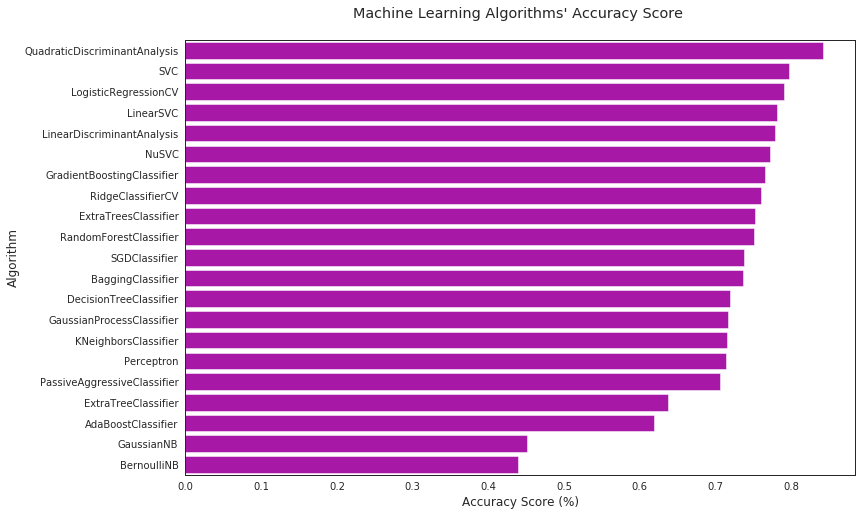

In [26]:
accuracy_barplot(MLA_compare_tuned)

We see a few changes in the top ranks when compared to the default hyper-parameters.

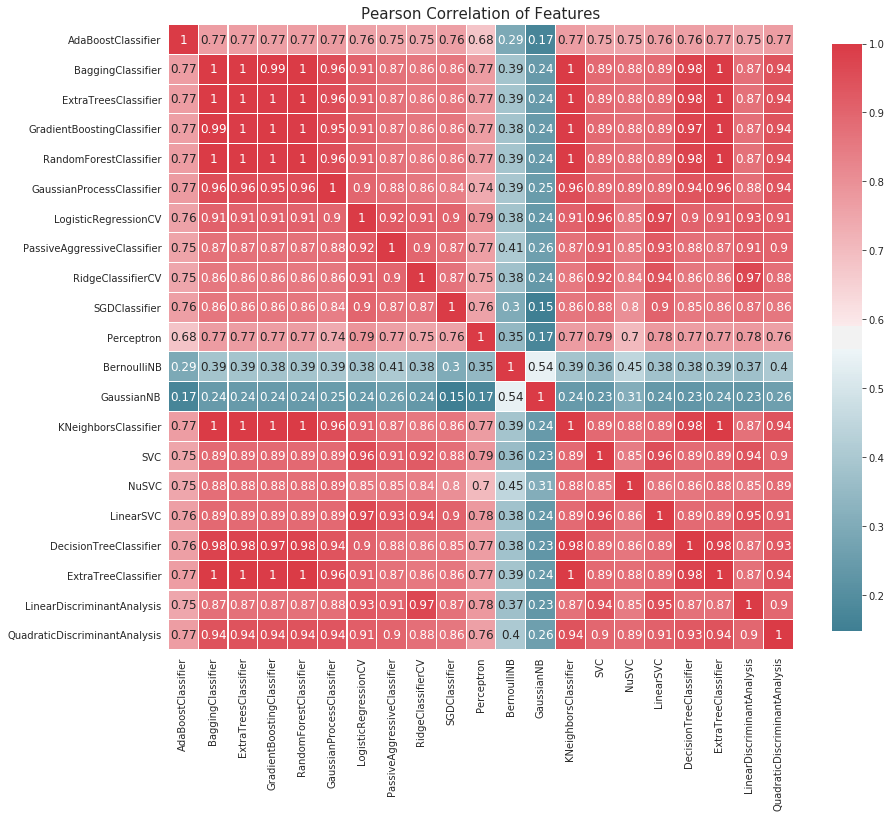

In [27]:
correlation_heatmap(MLA_predict_tuned)

It can be observed that tuned tree-based ensemble algorithms have very high correlation. QDA too has a somewhat high correlation with ensemble based and non-ensemble based tree algorithms.

# Final results

**Best accuracy: 84.2126%**

**Classifier: Quadratic Discriminant Analysis**

## Not over yet!

Some of the things I'll explore in the upcoming days:
* Feature engineering
* Bring the RF classifier to a modest accuracy
* Investigate why the voting model has a lower accuracy than QDA
* Read more about classifier selection with respect to specific dataset properties
* Better visualisation and comparison between tuned and non-tuned models
* Experiment with the other datasets keeping a similar flow
* Modularise the code better to ensure maximum re-usability as the code gets larger.